# Integración Numérica
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Métodos Numéricos</code></p>
<style type="text/css">
    .border {
        display: inline-block;
        border: solid 1px rgba(204, 204, 204, 0.4);
        border-bottom-color: rgba(187, 187, 187, 0.4);
        border-radius: 3px;
        box-shadow: inset 0 -1px 0 rgba(187, 187, 187, 0.4);
        background-color: inherit !important;
        vertical-align: middle;
        color: inherit !important;
        font-size: 11px;
        padding: 3px 5px;
        margin: 0 2px;
    }
</style>

## Solución de integrales por análisis numérico
la integración numérica constituye una amplia gama de algoritmos para calcular el valor numérico de una integral definida

## Agenda
1. Generalidades
1. Método del punto medio
1. Método del trapecio
1. Regla Simpson


In [1]:
# Importar módulos al cuaderno de jupyter
import math as m 
import numpy as np
import pylab as plt


## 1. Generalidades
---
En un sistema de coordenadas cartesianas, la integral de una función $\color{#a78a4d}{f(x)}$ representa el área limitada por la gráfica de la función y el eje de las abscisas $\color{#a78a4d}{x}$ en un intervalo $\color{#a78a4d}{(a,b)}$, agregando el signo positivo cuando la función toma valores positivos o está definida por encima del eje $\color{#a78a4d}{x}$ y agregando el signo negativo cuando la función toma valores negativos o está definida por debajo del eje $\color{#a78a4d}{x}$.

\begin{equation*}
\tag{1} \int_{a}^{b} f(x) \,dx \\
\end{equation*}

Resolver esta integral consiste en calcular el área total bajo la función $\color{#a78a4d}{f(x)}$ en un intervalo definido, del [teorema fundamental del calculo](https://es.wikipedia.org/wiki/Teorema_fundamental_del_c%C3%A1lculo) se obtiene la solucion exacta evaluando la función primitiva $\color{#a78a4d}{F(x)}$ en los limites de la integral definida.

\begin{equation*}
\tag{1} \int_{a}^{b} f(x) \,dx = F(b) - F(a) \\
\end{equation*}

La integración numérica es una técnica para aproximar una integral definida, cuando no existe una antiderivada elemental, como en el caso de la [función gaussiana](https://es.wikipedia.org/wiki/Funci%C3%B3n_gaussiana), que se usa frecuentemente en estadística, probabilidad y teoria del error.

\begin{equation*}
f(x) = a \cdot e^{-\frac{1}{2} \left(\frac{x-b}{c}\right)^2}
\end{equation*}

Teniendo en cuenta que el problema básico considerado por la integración numérica es calcular una solución aproximada a la integral definida; se tiene que el problema se reduce a calcular el área total bajo la función $\color{#a78a4d}{f(x)}$.

<p align="center">
  <img width="400" src="img/definite_integral.png">
</p>

## 2. Métodos del rectángulo
---
En el análisis numérico, los algoritmos del rectángulo son útiles para resolver numéricamente la integral definida; considerando como una aproximación del área total, la suma de las áreas de $\color{#a78a4d}{n}$ rectángulos.

<p align="center">
  <img width="400" src="img/Riemann_sum.png">
</p>

\begin{align}
\tag{2} A_i &= h_i \cdot b_i \\
\tag{3} A &= \sum h_i \cdot b_i \\
\tag{4} b &= \Delta x \\
\tag{5} A &= \Delta x \sum h_i \\
\end{align}

### a. Suma de Riemann por la izquierda
La suma de Riemann por la izquierda es uno de los algoritmos del rectángulo para resolver numéricamente la integral definida; considerando la altura de cada rectángulo como la función evaluada en el lado izquierdo de ese intervalo.

\begin{align}
\tag{6} A &= \Delta x \sum_{i=0}^{n} f(a + i \cdot \Delta x) \\
\tag{7} \Delta x &= \frac{b-a}{n}  \\
\end{align}

### b. Suma de Riemann por la derecha
La suma de Riemann por la derecha es uno de los algoritmos del rectángulo para resolver numéricamente la integral definida; considerando la altura de cada rectángulo como la función evaluada en el lado derecho de ese intervalo.

\begin{align}
\tag{8} A &= \Delta x \sum_{i=0}^{n} f(b - i \cdot \Delta x) \\
\tag{9} \Delta x &= \frac{b-a}{n}  \\
\end{align}

### c. Método del punto medio
En el análisis numérico, el método del punto medio es uno de los algoritmos del rectángulo para resolver numéricamente la integral definida; considerando la altura de cada rectángulo como la función evaluada en el punto medio de ese intervalo.

\begin{align}
\tag{10} A &= \Delta x \sum_{i=0}^{n} f(a + \frac{2i+1}{2} \cdot \Delta x) \\
\tag{11} \Delta x &= \frac{b-a}{n}  \\
\end{align}

In [2]:
# Defino los métodos de suma de rectangulos - izquierda
def _Riemman_izq(Func, limA, limB, numI):
    """ Método de la Bisección para encontrar raíces en un intervalo.

        ## Parámetros:
            Func (function) : función que depende de una variable.
            limA (function) : derivada de la funcion.
            limB (int)      : semilla de la solución.
            numI (int)      : número máximo de iteraciones.
        
        ## Devoluciones:
            Area (float)       : valor de area encontrado.
    """
    Δx = (limB - limA) / numI
    Alturas = 0
    for i in range(numI):
        Alturas += Func(limA + i * Δx)

    Area = Δx * Alturas
    return Area

# Defino los métodos de suma de rectangulos - izquierda
def _Riemman_der(Func, limA, limB, numI):
    """ Método de la Bisección para encontrar raíces en un intervalo.

        ## Parámetros:
            Func (function) : función que depende de una variable.
            limA (function) : derivada de la funcion.
            limB (int)      : semilla de la solución.
            numI (int)      : número máximo de iteraciones.
        
        ## Devoluciones:
            Area (float)       : valor de area encontrado.
    """
    Δx = (limB - limA) / numI
    Alturas = 0
    for i in range(numI):
        Alturas += Func(limB - i * Δx)

    Area = Δx * Alturas
    return Area

# Defino los métodos de suma de rectangulos - izquierda
def _Riemman_med(Func, limA, limB, numI):
    """ Método de la Bisección para encontrar raíces en un intervalo.

        ## Parámetros:
            Func (function) : función que depende de una variable.
            limA (function) : derivada de la funcion.
            limB (int)      : semilla de la solución.
            numI (int)      : número máximo de iteraciones.
        
        ## Devoluciones:
            Area (float)       : valor de area encontrado.
    """
    Δx = (limB - limA) / numI
    Alturas = 0
    for i in range(numI):
        Alturas += Func(limA + (2*i + 1)/2 * Δx)

    Area = Δx * Alturas
    return Area

## 3. Método del trapecio
---
En el análisis numérico, el método del trapecio es un algoritmo para resolver numéricamente la integral definida; considerando el area total debajo de la función como la suma de las areas de $\color{#a78a4d}{n}$ trapecios rectos.

\begin{align}
\tag{12} A_i &= \frac{b1_i + b2_i}{2} \cdot h_i \\
\tag{13} A &= \frac{1}{2} \sum h_i \cdot (b1_i + b2_i) \\
\tag{14} h &= \Delta x \\
\tag{15} A &= \frac{ \Delta x }{2} \sum (b1_i + b2_i) \\
\tag{16} A &= \frac{ \Delta x }{2} \sum f(a + i \cdot \Delta x) + f(a + \Delta x + i \cdot \Delta x) \\
\end{align}

In [3]:
# Defino el métodos del trapecio
def _trapecio(Func, limA, limB, numI):
    """ Método de la Bisección para encontrar raíces en un intervalo.

        ## Parámetros:
            Func (function) : función que depende de una variable.
            limA (function) : derivada de la funcion.
            limB (int)      : semilla de la solución.
            numI (int)      : número máximo de iteraciones.
        
        ## Devoluciones:
            Area (float)       : valor de area encontrado.
    """
    Δx = (limB - limA) / numI
    Bases = 0
    for i in range(numI):
        Bases += Func(limA + i * Δx) + Func(limA + Δx + i * Δx)

    Area = Δx/2 * Bases
    return Area

## 4. Reglas Simpson
---

<p align="center">
  <img width="400" src="img/gaussian_function.png">
</p>

En el análisis numérico, la regla de Simpson es un algoritmo para resolver numéricamente la integral definida; considerando el area total debajo de la función como la suma de las areas de $\color{#a78a4d}{n}$ polinomios mas simples.

### a. Ecuaciones lineales
Se aproxima la integral usando $\color{#a78a4d}{n}$ polinomios de orden dos $\color{#a78a4d}{P_2(x)}$, evaluando la función en tres puntos segun lo define el [polinomio de Lagrange](https://es.wikipedia.org/wiki/Interpolaci%C3%B3n_polin%C3%B3mica_de_Lagrange) del mismo orden.

\begin{align}
\tag{17} P_2(x) &= x2 + a_1 x + a_o \\
\tag{18} l_2(x) &= f(x_o) \frac{x-x_1}{x_o-x_1} \cdot \frac{x-x_2}{x_o-x_2} + f(x_1) \frac{x-x_o}{x_1-x_o} \cdot \frac{x-x_2}{x_1-x_2} + f(x_2)\frac{x-x_o}{x_2-x_o} \cdot \frac{x-x_1}{x_2-x_1} \\
\tag{19} \int_{a}^{b} f(x) \,dx &= \int_{a}^{b} l_2(x) \,dx + E(f) \\

\tag{13} A &= \frac{1}{2} \sum h_i \cdot (b1_i + b2_i) \\

\tag{16} A &= \frac{b-a}{6} \left( f(a) + 4 f(\frac{a+b}{2}) + f(b) \right) \\

\tag{16} A &= \frac{\Delta x}{6} \left( f(a + i \cdot \Delta x) + 4 f(a + \frac{(2i+1)}{2} \Delta x) + f(a + \Delta x + i \cdot \Delta x) \right) \\
\end{align}


In [4]:
# Defino el métodos de la regla simpson
def _simpson(Func, limA, limB, numI):
    """ Método de la Bisección para encontrar raíces en un intervalo.

        ## Parámetros:
            Func (function) : función que depende de una variable.
            limA (function) : derivada de la funcion.
            limB (int)      : semilla de la solución.
            numI (int)      : número máximo de iteraciones.
        
        ## Devoluciones:
            Area (float)       : valor de area encontrado.
    """
    Δx = (limB - limA) / numI
    Bases = 0
    for i in range(numI):
        Bases += Func(limA + i * Δx) + 4 * Func(limA + (2*i + 1)/2 * Δx) + Func(limA + Δx + i * Δx)

    Area = Δx/6 * Bases
    return Area

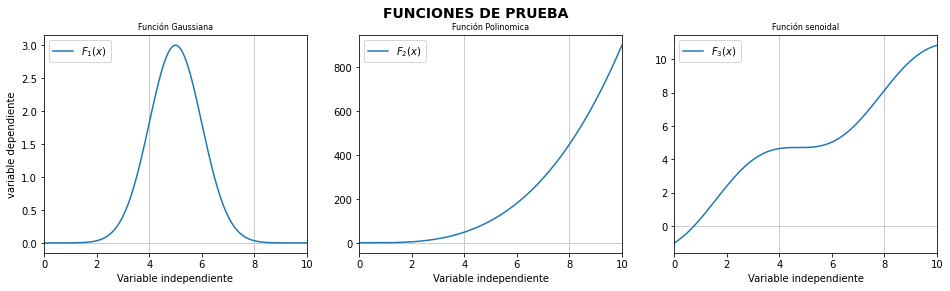

In [5]:
# Función Gaussiana
def _funcion_gauss(a, b, c, x):
    y = a * np.e**(-1/2 * ((x-b)/c)**2)
    #y = np.e**(-x**2)
    return y

# Funciónes de prueba
F1 = lambda x: _funcion_gauss(3, 5, 1, x)
F2 = lambda x: x**3 - x**2 + 1
F3 = lambda x: x - np.cos(x)

# Vectores de prueba
x = np.linspace(0, 10, 512, endpoint=True)

# Gráficas
#-------------------
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(16, 4)
fig.suptitle('Funciones de Prueba'.upper(), fontsize=14, fontweight="bold")

# Gráficas 1
ax[0].axhline(y = 0, linewidth=1.0, color="#ccc")
ax[0].axvline(x = 4, linewidth=1.0, color="#ccc")
ax[0].axvline(x = 8, linewidth=1.0, color="#ccc")
ax[0].plot(x, F1(x), label="$F_1(x)$")
ax[0].set_xlim([0, 10])
ax[0].set_title("Función Gaussiana", fontsize=8)
ax[0].set_xlabel("Variable independiente")
ax[0].set_ylabel("variable dependiente")
ax[0].legend()

# Gráficas 2
ax[1].axhline(y = 0, linewidth=1, color="#ccc")
ax[1].axvline(x = 4, linewidth=1.0, color="#ccc")
ax[1].axvline(x = 8, linewidth=1.0, color="#ccc")
ax[1].plot(x, F2(x), label="$F_2(x)$")
ax[1].set_xlim([0, 10])
ax[1].set_title("Función Polinomica", fontsize=8)
ax[1].set_xlabel("Variable independiente")
ax[1].legend()

# Gráficas 3
ax[2].axhline(y = 0, linewidth=1, color="#ccc")
ax[2].axvline(x = 4, linewidth=1.0, color="#ccc")
ax[2].axvline(x = 8, linewidth=1.0, color="#ccc")
ax[2].plot(x, F3(x), label="$F_3(x)$")
ax[2].set_xlim([0, 10])
ax[2].set_title("Función senoidal", fontsize=8)
ax[2].set_xlabel("Variable independiente")
ax[2].legend()

plt.show()

In [6]:
A1 = _Riemman_izq(F3, 4, 8, 5)
A2 = _Riemman_der(F3, 4, 8, 5)
A3 = _Riemman_med(F3, 4, 8, 5)
A4 =    _trapecio(F3, 4, 8, 5)
A5 =    _simpson(F3, 4, 8, 5)
print(f"Area de Riemann por la izquierda    : {A1}")
print(f"Area de Riemann por la derecha      : {A2}") 
print(f"Area por el método del punto medio  : {A3}") 
print(f"Area por el método del trapecio     : {A4}")
print(f"Area por el método del simpson      : {A5}") 

Area de Riemann por la izquierda    : 20.951234020498777
Area de Riemann por la derecha      : 23.744719150854777
Area por el método del punto medio  : 22.20639086327648
Area por el método del trapecio     : 22.347976585676776
Area por el método del simpson      : 22.253586104076575


---
## Mas Recursos

- [Integración numérica](https://es.wikipedia.org/wiki/Integraci%C3%B3n_num%C3%A9rica) (Wikipedia)
- [Suma de Riemann](https://es.wikipedia.org/wiki/Suma_de_Riemann) (Wikipedia)
- [Regla del trapecio](https://es.wikipedia.org/wiki/Regla_del_trapecio) (Wikipedia)
- [Regla de Simpson](https://es.wikipedia.org/wiki/Regla_de_Simpson) (Wikipedia)

